# **[Lighthouse] Desafio Ciência de Dados 2025-3**

## Desafio



Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

## Entregas



1.   Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
2.   Responda também às seguintes perguntas:


*   Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
*   O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
*   Existe algum padrão no texto do nome do local para lugares de mais alto valor?

3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

4. Supondo um apartamento com as seguintes características: Qual seria a sua sugestão de preço?



```
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

```

5. Salve o modelo desenvolvido no formato .pkl.

6. A entrega deve ser feita através de um repositório de código público que contenha:
* README explicando como instalar e executar o projeto
* Arquivo de requisitos com todos os pacotes utilizados e suas versões
* Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
* Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
* Arquivo .pkl conforme passo 5 acima.

7. Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link".



## Dicionário dos dados

	A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem


reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva


In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [179]:
BASE = "./data/"

In [180]:
csv = BASE+"teste_indicium_precificacao.csv"

## Carregando dados

In [181]:
df = pd.read_csv(csv, index_col=0)

In [182]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [183]:
#Verificando as 5 primeiras linhas
df.head(5)

,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,,,,,,,,,,,,,,,
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [184]:
# Verificando o tamanho da base
df.shape

(48894, 15)

In [185]:
# Verificando o nome das colunas
df.columns

Index(['nome', 'host_id', 'host_name', 'bairro_group', 'bairro', 'latitude',
       'longitude', 'room_type', 'price', 'minimo_noites', 'numero_de_reviews',
       'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365'],
      dtype='object')

## Visualizando um resumo das informações

In [186]:
#Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48894 entries, 2595 to 36487245
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   host_id                        48894 non-null  int64  
 2   host_name                      48873 non-null  object 
 3   bairro_group                   48894 non-null  object 
 4   bairro                         48894 non-null  object 
 5   latitude                       48894 non-null  float64
 6   longitude                      48894 non-null  float64
 7   room_type                      48894 non-null  object 
 8   price                          48894 non-null  int64  
 9   minimo_noites                  48894 non-null  int64  
 10  numero_de_reviews              48894 non-null  int64  
 11  ultima_review                  38842 non-null  object 
 12  reviews_por_mes                38842 non-null

In [187]:
# Contando a quantidade de valores nulos
df.isnull().sum()

nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As variáveis 'ultima_review' e 'reviews_por_mes' apresentam uma quantidade significativa de valores nulos, porém se analisarmos a variável 'numero_de_reviews', podemos observar que esse valores nulos apenas represetam locações que nunca foram avaliadas.

In [188]:
df[df['ultima_review'].isna() & df['reviews_por_mes'].isna()].describe()

,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,10052.00,10052.00,10052.00,10052.00,10052.00,10052.00,0.00,10052.00,10052.00
mean,80684372.29,40.73,-73.96,192.92,11.52,0.00,NaN,14.79,104.66
std,87125927.33,0.05,0.04,358.65,29.21,0.00,NaN,50.36,139.07
min,4632.00,40.50,-74.24,0.00,1.00,0.00,NaN,1.00,0.00
25%,12075188.00,40.70,-73.98,70.00,1.00,0.00,NaN,1.00,0.00
50%,39795381.50,40.73,-73.96,120.00,3.00,0.00,NaN,1.00,6.00
75%,133000062.50,40.76,-73.94,200.00,14.00,0.00,NaN,2.00,214.25
max,274321313.00,40.91,-73.72,10000.00,1000.00,0.00,NaN,327.00,365.00


In [189]:
# Verificando o número de valores únicos
df.nunique()

nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

Com esses dados, podemos começar a analisar quais variáveis serão mais significativas na criação do modelo, como "bairro_group" e "room_type", que apresentam um número pequeno de valores diferentes.

In [190]:
# Verificando as informações estatísticas
df.describe()

,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,38842.00,48894.00,48894.00
mean,67621393.58,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,78611176.15,0.05,0.05,240.16,20.51,44.55,1.68,32.95,131.62
min,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,7822736.75,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,30795529.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


Aqui já podemos notar um problema com a variável "price", cujo mínimo apresentado é 0, o que pode atrapalhar posteriormente nas análises e na predição do modelo.

Além disso, podemos analisar também as variáveis "numero_de_reviews" e "disponibilidade_365", que também apresentam como minímo o valor 0.

## Limpeza dos dados

In [191]:
df_clean = df.copy()

In [192]:
#remover colunas desnecessárias
df_clean = df_clean.drop(["host_id", "host_name", "latitude", "longitude"], axis=1)
df_clean.head()

,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,,,,,,,,,,,
2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [193]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48894 entries, 2595 to 36487245
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   bairro_group                   48894 non-null  object 
 2   bairro                         48894 non-null  object 
 3   room_type                      48894 non-null  object 
 4   price                          48894 non-null  int64  
 5   minimo_noites                  48894 non-null  int64  
 6   numero_de_reviews              48894 non-null  int64  
 7   ultima_review                  38842 non-null  object 
 8   reviews_por_mes                38842 non-null  float64
 9   calculado_host_listings_count  48894 non-null  int64  
 10  disponibilidade_365            48894 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.5+ MB


In [194]:
#remover linhas onde o preço é 0
df_remove = df_clean.loc[df_clean['price'] == 0]
df_clean = df_clean.drop(df_remove.index)

In [195]:
#preencher valores de texto que estão nulos
df['nome'] = df['nome'].fillna('Unamed')

In [196]:
#preencher valores nulos com 0
df_clean.fillna(0, inplace=True)

Agora o dataset está pronto para análises!

In [197]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48883 entries, 2595 to 36487245
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48883 non-null  object 
 1   bairro_group                   48883 non-null  object 
 2   bairro                         48883 non-null  object 
 3   room_type                      48883 non-null  object 
 4   price                          48883 non-null  int64  
 5   minimo_noites                  48883 non-null  int64  
 6   numero_de_reviews              48883 non-null  int64  
 7   ultima_review                  48883 non-null  object 
 8   reviews_por_mes                48883 non-null  float64
 9   calculado_host_listings_count  48883 non-null  int64  
 10  disponibilidade_365            48883 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.5+ MB


In [198]:
df_clean.to_csv(BASE+'teste_indicium_precificacao_clean.csv')

## Análise das Variáveis Categóricas

### Estatísticas dos tipos de quartos

<Axes: xlabel='room_type', ylabel='count'>

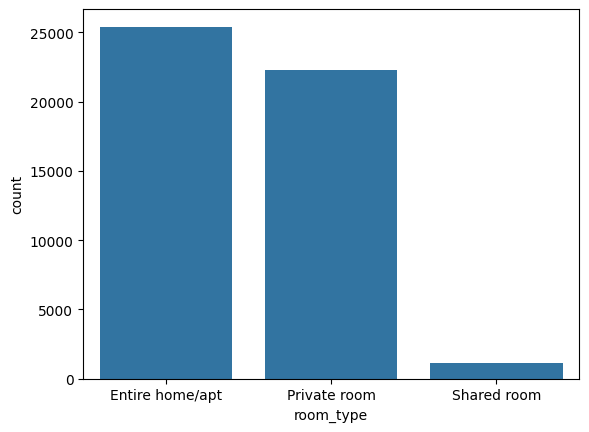

In [199]:
sns.countplot(x=df_clean["room_type"])

Contagem dos tipos de quartos, com maior prevalência de "Entire home/apt" e "Private room".

#### **Média de preço por tipo de quarto**

In [200]:
df_preco_room_type = df_clean.groupby(["room_type"]).agg({"price":"mean"}).reset_index()

Text(0, 0.5, 'Preço médio ($)')

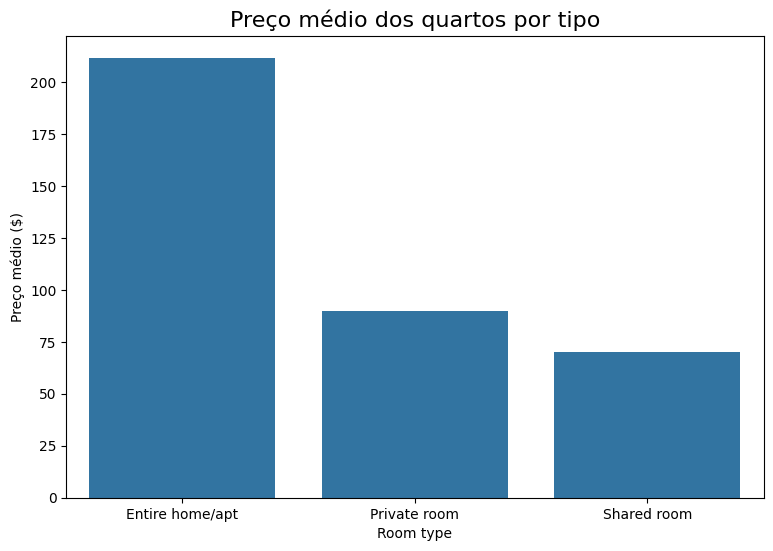

In [201]:
y = df_preco_room_type["price"]
x = df_preco_room_type["room_type"]

plt.figure(figsize=(9, 6))
sns.barplot(x=x, y=y)
plt.title('Preço médio dos quartos por tipo', fontsize = 16)
plt.xlabel('Room type')
plt.ylabel('Preço médio ($)')

### Estatísticas dos grupos bairros

<Axes: xlabel='bairro_group', ylabel='count'>

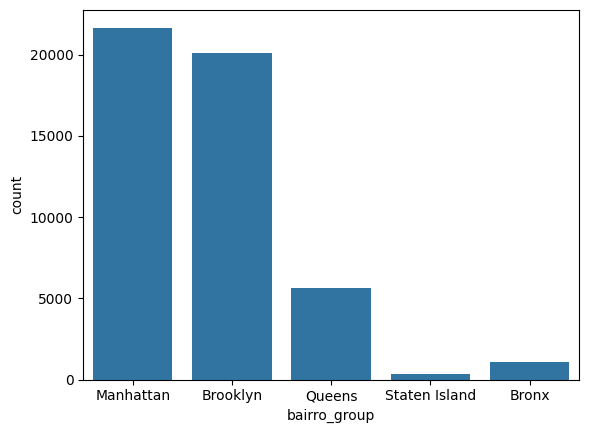

In [202]:
sns.countplot(x=df_clean["bairro_group"])

Contagem dos grupos de bairros, com maior prevalência em "Manhattan" e "Brooklyn".

#### **Média de preço por grupo de bairros**

In [203]:
df_preco_bairro_group = df_clean.groupby(["bairro_group"]).agg({"price":"mean"}).reset_index()
df_preco_bairro_group = df_preco_bairro_group.sort_values(by="price", ascending=False)

Text(0, 0.5, 'Preço médio ($)')

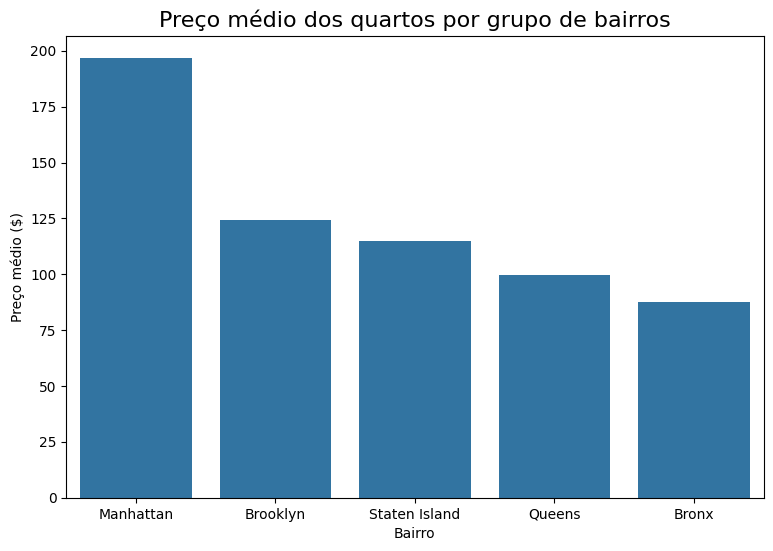

In [204]:
y = df_preco_bairro_group["price"]
x = df_preco_bairro_group["bairro_group"]

plt.figure(figsize=(9, 6))
sns.barplot(x=x, y=y)
plt.title('Preço médio dos quartos por grupo de bairros', fontsize = 16)
plt.xlabel('Bairro')
plt.ylabel('Preço médio ($)')

#### **Média de preços por bairro**

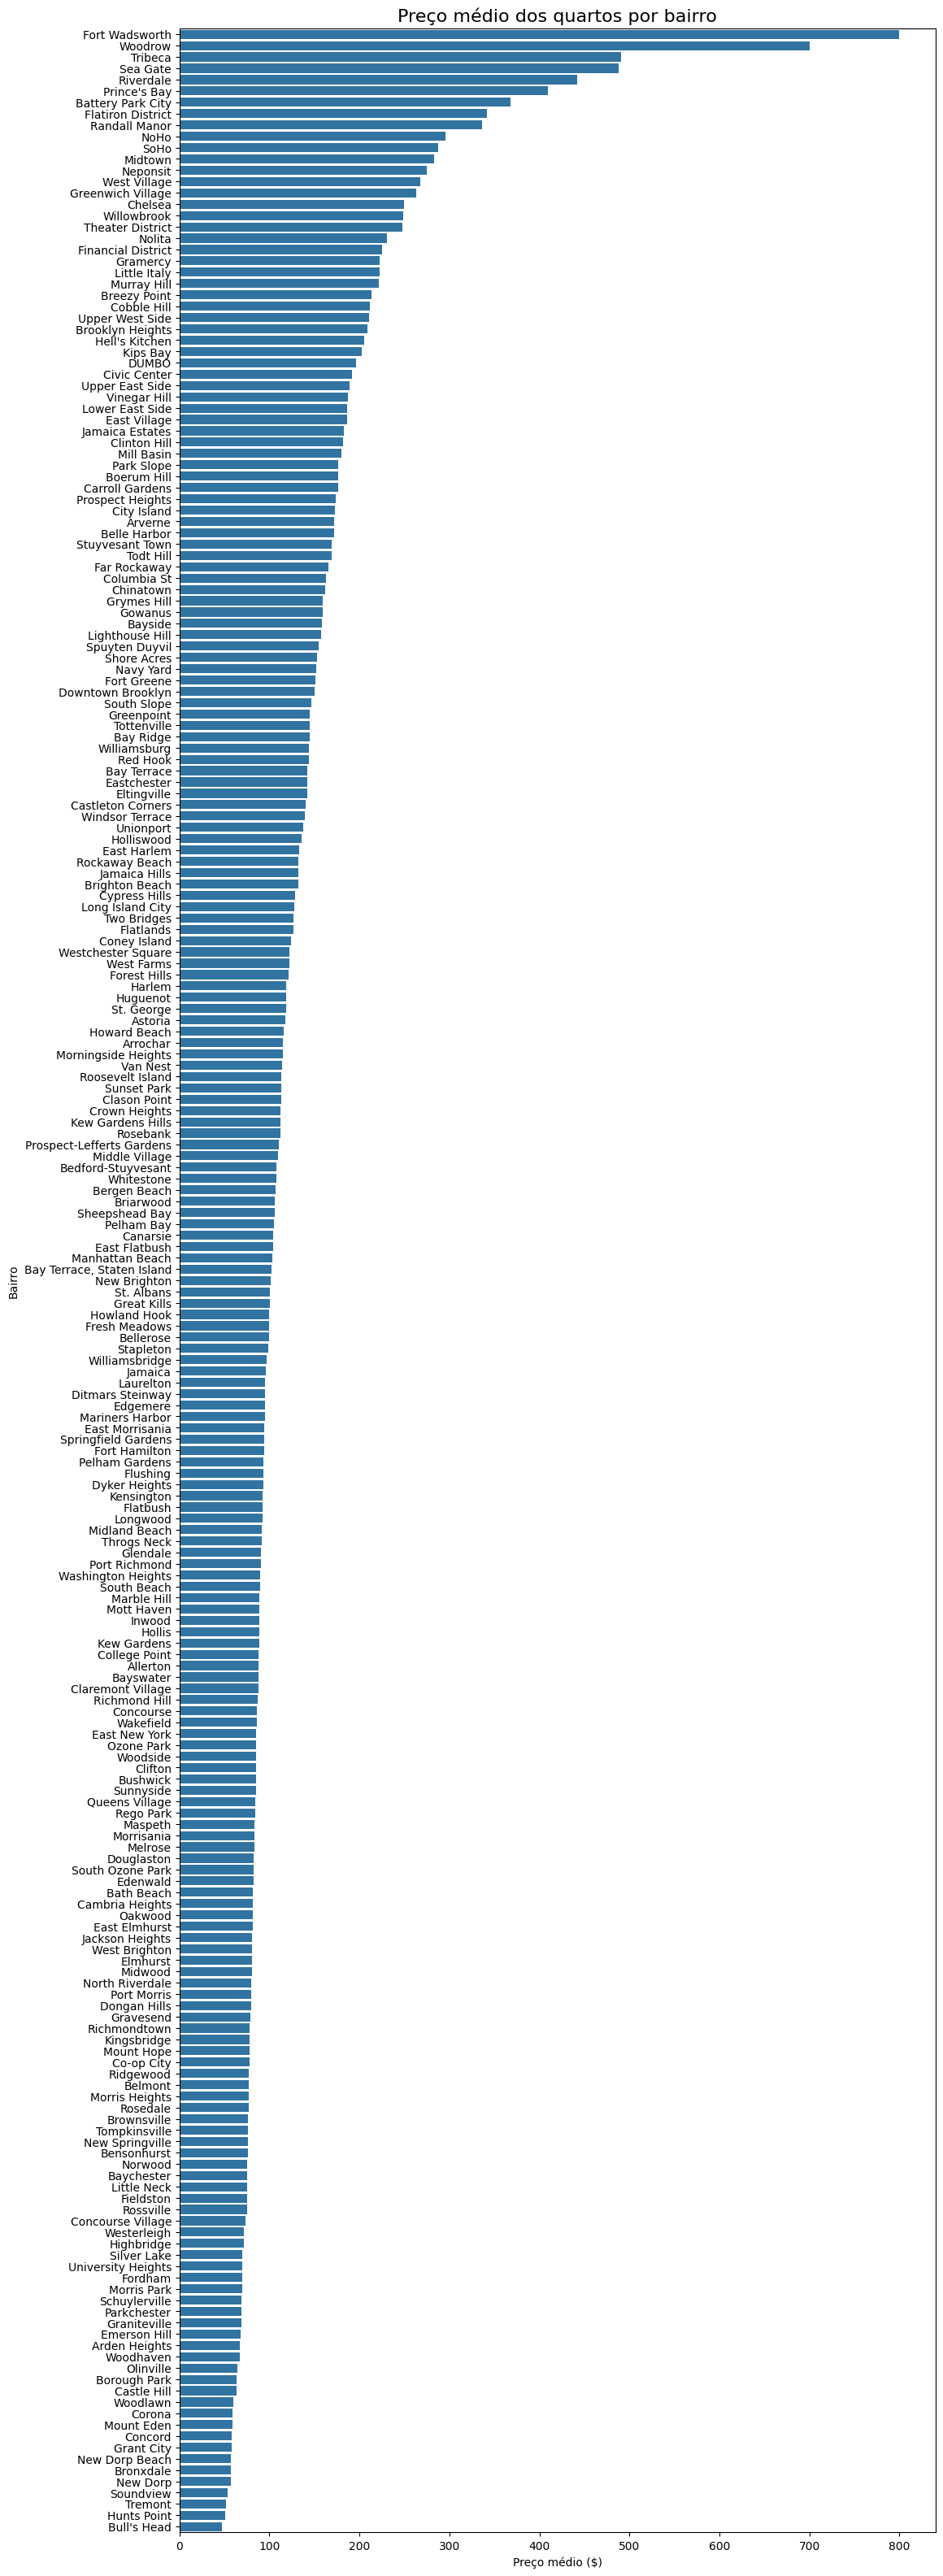

In [205]:
df_preco_bairro = df_clean.groupby(["bairro"]).agg({"price":"mean"}).reset_index()
df_preco_bairro = df_preco_bairro.sort_values(by='price', ascending=False)

y = df_preco_bairro['bairro']
x = df_preco_bairro["price"]

plt.figure(figsize=(12, 40))
sns.barplot(x=x, y=y)
plt.title('Preço médio dos quartos por bairro', fontsize = 16)
plt.xlabel('Preço médio ($)')
plt.ylabel('Bairro');

Investigando um pouco mais os primeiros bairros com maiores preços médios, vemos que os bairros com maiores preços possuem apenas um quarto anunciado em cada, o que afeta na analise de média dos preços.

In [206]:
df_clean[df_clean['bairro'] == 'Fort Wadsworth']

,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,,,,,,,,,,,
20305160,Beach House Retreat. 15 minutes from Manhattan.,Staten Island,Fort Wadsworth,Entire home/apt,800,7,0,0,0.00,3,365


In [207]:
df_clean[df_clean['bairro'] == 'Woodrow']

,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,,,,,,,,,,,
1798271,Spacious center hall colonial,Staten Island,Woodrow,Entire home/apt,700,7,0,0,0.00,1,0


##### **Média de preço dos bairros com maior quantidade de anúncios**

In [208]:
top_bairros = df_clean['bairro'].value_counts()[:100].index.tolist()
df_top_bairros = df_clean[df_clean['bairro'].isin(top_bairros)]

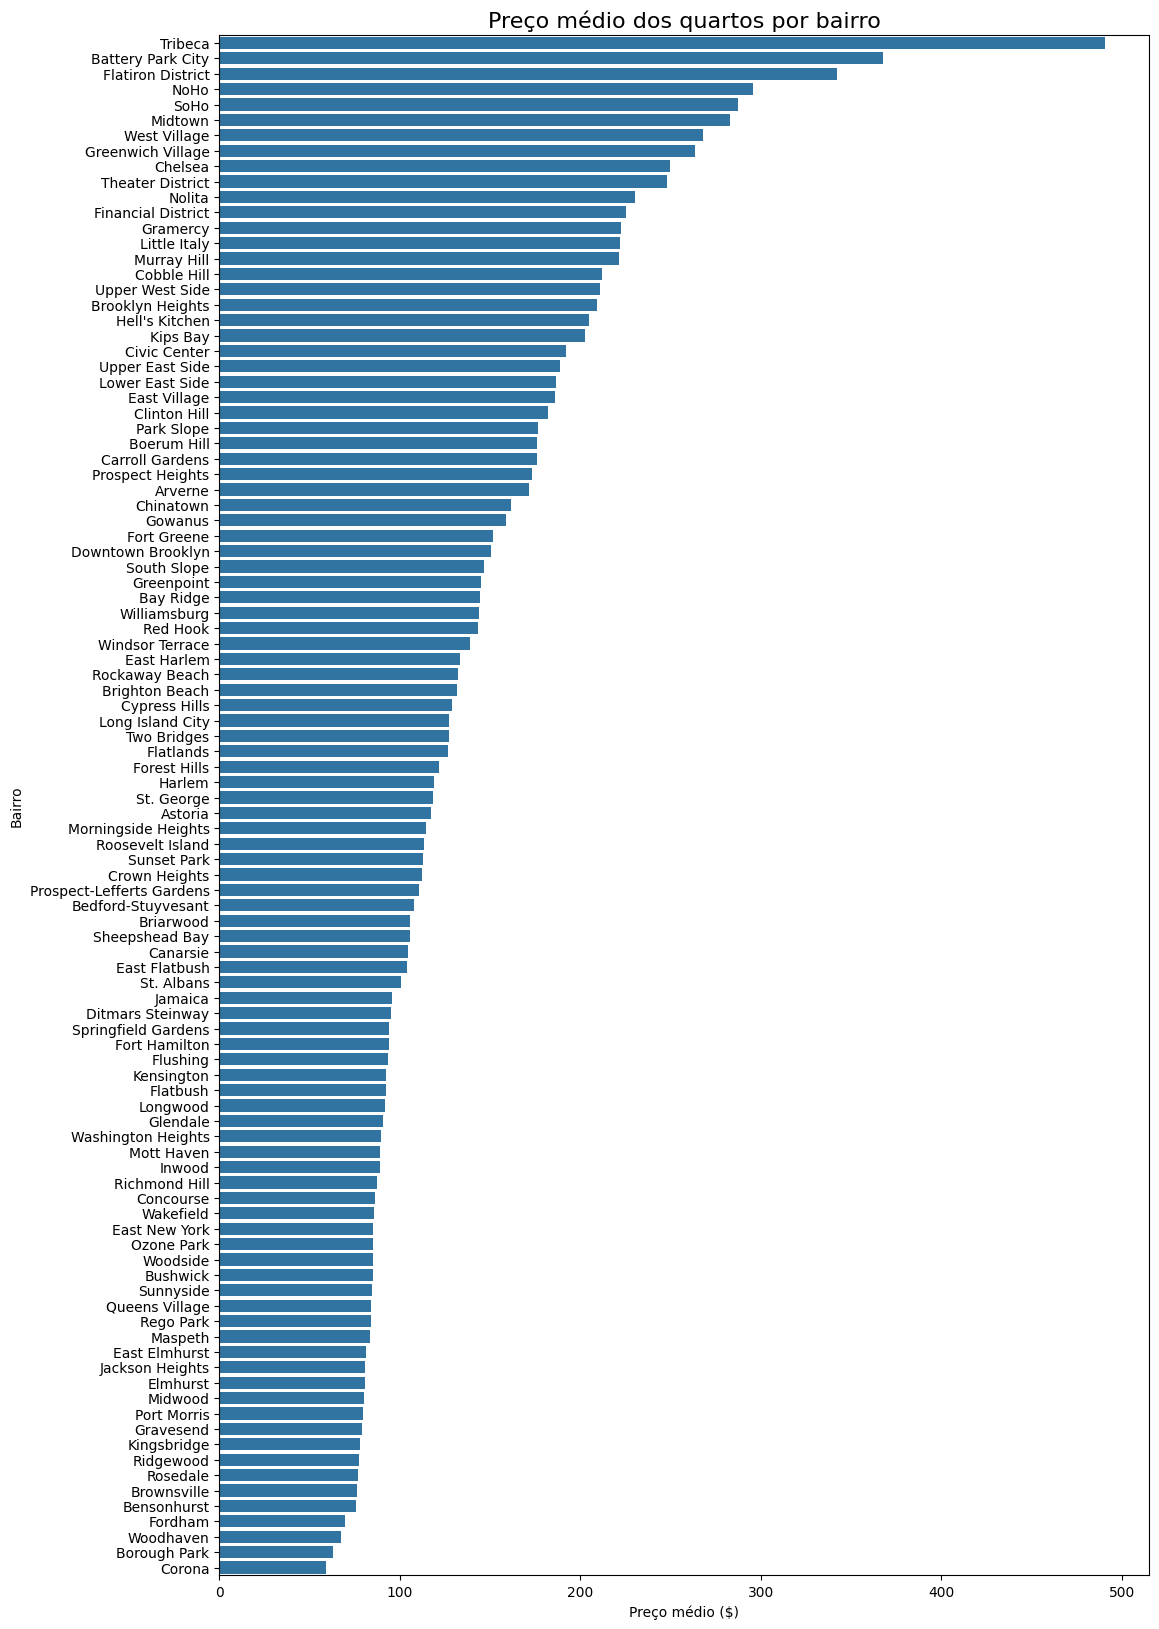

In [209]:
df_preco_top_bairros = df_top_bairros.groupby(["bairro"]).agg({"price":"mean"}).reset_index()
df_preco_top_bairros = df_preco_top_bairros.sort_values(by='price', ascending=False)

y = df_preco_top_bairros['bairro']
x = df_preco_top_bairros["price"]

plt.figure(figsize=(12, 20))
sns.barplot(x=x, y=y)
plt.title('Preço médio dos quartos por bairro', fontsize = 16)
plt.xlabel('Preço médio ($)')
plt.ylabel('Bairro');

In [210]:
df_top_bairros.shape[0]/ df_clean.shape[0] * 100

96.50798846224659

Podemos observar que os 100 bairros que mais possuem anúncios no dataset representam um percentual significativo dos dados, e que o ranking da média de preços muda um pouco com esse filtro.

#### **Média de preços por região e tipos de quarto**

In [211]:
df_preco_bairro_room_type = (df_clean
                            .groupby(["bairro_group","room_type"])
                            .agg({"price":"mean"})
                            .reset_index())
df_preco_bairro_room_type = df_preco_bairro_room_type.sort_values(by='price', ascending=False)

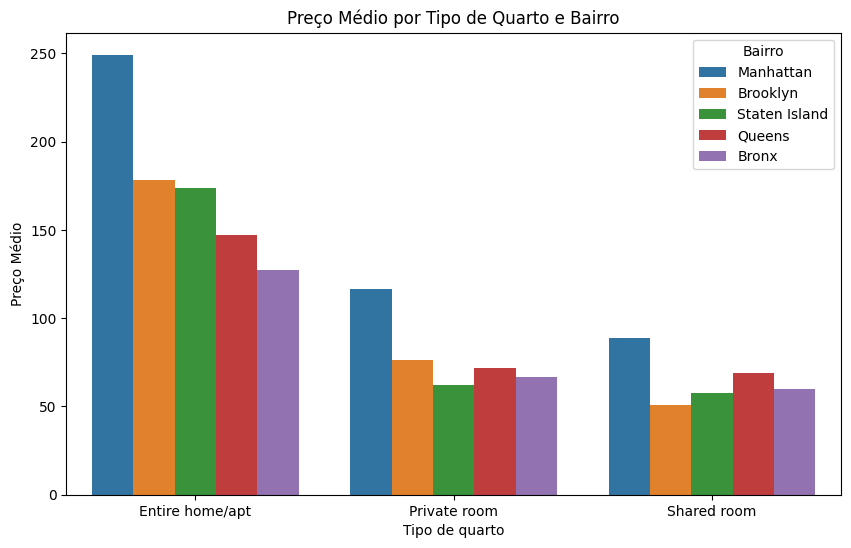

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(x="room_type", y="price", hue="bairro_group", data=df_preco_bairro_room_type, errorbar=None)
plt.title("Preço Médio por Tipo de Quarto e Bairro")
plt.xlabel("Tipo de quarto")
plt.ylabel("Preço Médio")
plt.legend(title="Bairro")
plt.show()

Podemos notar que as média de preços são bastante parecidas para cada tipo de quarto em cada grupo de bairro, com exceção de Manhattan, que apresenta preços mais elevados.

### **Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

In [213]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [214]:
#Filtrar locais com valores mais altos
df_filter = df_clean.loc[df_clean['price'] < df_clean['price'].quantile(0.99)]
df_lugares_mais_caros = df_clean.drop(df_filter.index)

In [215]:
text = df_lugares_mais_caros["nome"].tolist()
text = " ".join(i for i in df_lugares_mais_caros["nome"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=2048,
                      max_words=1000).generate(text)

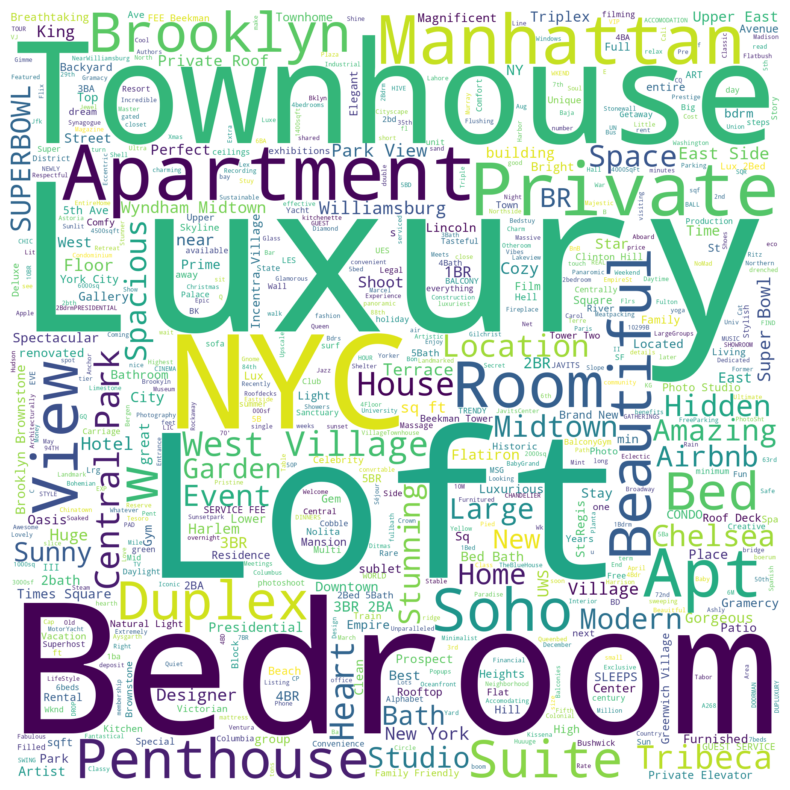

In [216]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

Como podemos perceber por essa nuvem de palavras geradas a partir dos nomes dos lugares que estão entre os 1% mais caros, palavras como "Luxury", "Loft", "Bedroom", "Townhouse" e "Private" aparecem de maneira frequente, logo, é possível concluir que de fato existe um certo padrão.

## Análise das Variáveis Numéricas

### Análise do minimo de noites

<Axes: xlabel='minimo_noites', ylabel='Count'>

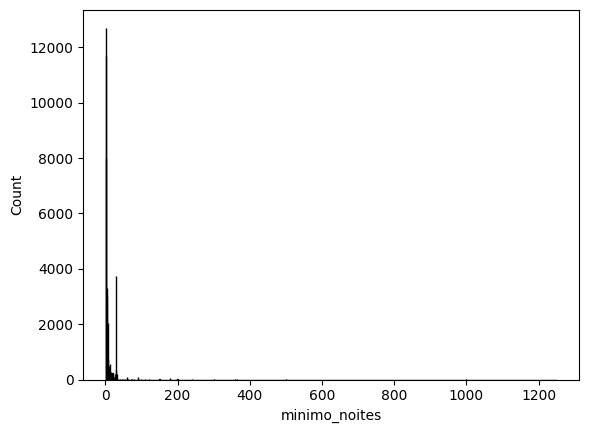

In [217]:
sns.histplot(
    df_clean,
    x="minimo_noites",
    linewidth=1
)

Podemos notar que a distribuição está concentrada em valores baixos.

Se filtrarmos analisar a maior parte dos dados, nesse caso 99%, podemos ter uma melhor noção sobre como os dados estão distribuídos.

In [218]:
df_filter = df_clean.loc[df_clean['minimo_noites'] > df_clean['minimo_noites'].quantile(0.99)]
df_minimo_noites = df_clean.drop(df_filter.index)

<Axes: xlabel='minimo_noites', ylabel='Count'>

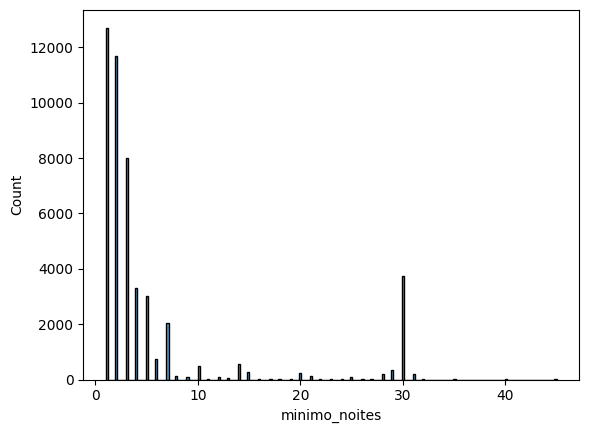

In [219]:
sns.histplot(
    df_minimo_noites,
    x="minimo_noites",
    linewidth=1
)

Investigando o 1% com maiores valores para o minimo de noites

In [220]:
df_filter = df_clean.loc[df_clean['minimo_noites'] < df_clean['minimo_noites'].quantile(0.99)]
df_minimo_noites_max = df_clean.drop(df_filter.index)

In [221]:
df_minimo_noites_max.sort_values(by='minimo_noites', ascending=False)[:10]

,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,,,,,,,,,,,
4204302,Prime W. Village location 1 bdrm,Manhattan,Greenwich Village,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
1615764,0,Manhattan,Battery Park City,Entire home/apt,400,1000,0,0,0.00,1,362
30378211,Shared Studio (females only),Manhattan,Greenwich Village,Shared room,110,999,0,0,0.00,1,365
10053943,Historic Designer 2 Bed. Apartment,Manhattan,Harlem,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
20990053,Beautiful place in Brooklyn! #2,Brooklyn,Williamsburg,Private room,79,999,24,2018-06-28,1.12,6,249
6169897,Wonderful Large 1 bedroom,Manhattan,Harlem,Entire home/apt,75,500,0,0,0.00,1,362
35834935,Williamsburg Apartment,Brooklyn,Williamsburg,Entire home/apt,140,500,0,0,0.00,1,331
8668115,Zen Room in Crown Heights Brooklyn,Brooklyn,Crown Heights,Private room,50,500,10,2016-09-22,0.22,1,365
5431845,Beautiful Fully Furnished 1 bed/bth,Queens,Long Island City,Entire home/apt,134,500,30,2018-06-24,0.57,1,90


Observando brevemente os dados, notamos que a maioria dos locais com maiores valores para o minimo de noites que o usuário deve reservar apresenta uma alta disponibilidade e um número baixo de reviews, o que pode indicar que esses lugares não estão sendo muito procurados.

### Análise do número de reviews

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

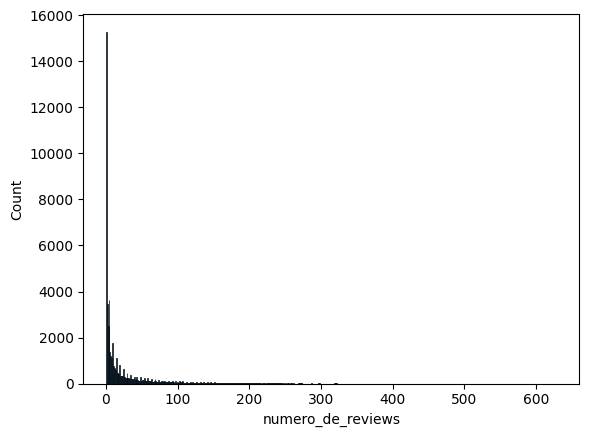

In [222]:
sns.histplot(
    df_clean,
    x="numero_de_reviews",
    linewidth=0.5
)

In [223]:
df_filter = df_clean.loc[df_clean['numero_de_reviews'] == 0]
df_numero_reviews = df_clean.drop(df_filter.index)

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

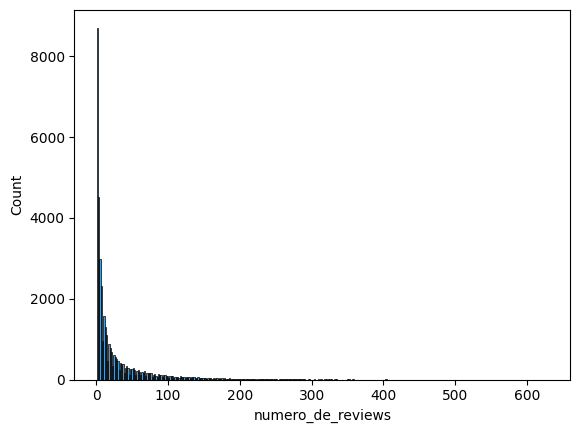

In [224]:
sns.histplot(
    df_numero_reviews,
    x="numero_de_reviews",
    linewidth=0.5
)

In [225]:
df_filter = df_clean.loc[df_clean['numero_de_reviews'] > df_clean['numero_de_reviews'].quantile(0.96)]
df_numero_reviews = df_clean.drop(df_filter.index)

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

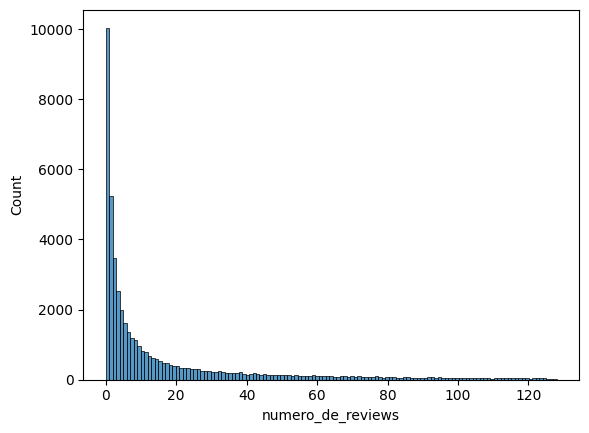

In [226]:
sns.histplot(
    df_numero_reviews,
    x="numero_de_reviews",
    linewidth=0.5
)

In [227]:
df_filter = df_clean.loc[df_clean['numero_de_reviews'] < df_clean['numero_de_reviews'].quantile(0.96)]
df_numero_reviews_max = df_clean.drop(df_filter.index)

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

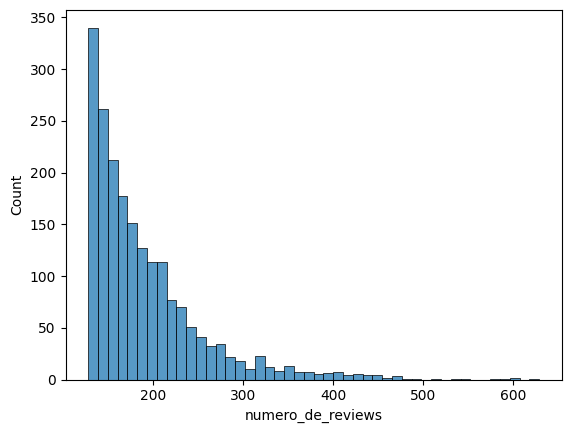

In [228]:
sns.histplot(
    df_numero_reviews_max,
    x="numero_de_reviews",
    linewidth=0.5
)

### Análise da disponibilidade ao longo do ano

<Axes: xlabel='disponibilidade_365', ylabel='Count'>

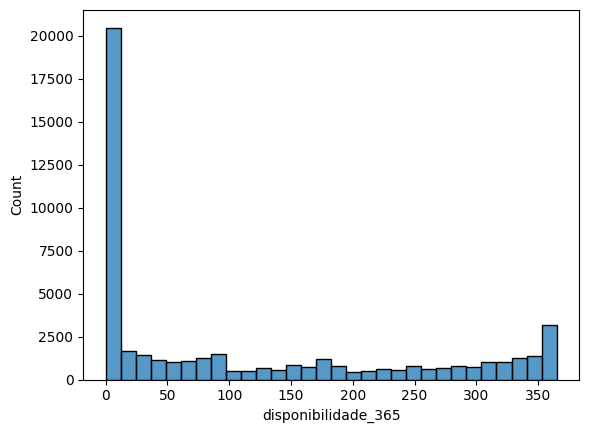

In [229]:
sns.histplot(
    df_clean,
    x="disponibilidade_365",
    linewidth=1
)

Os valores de disponibilidade se mostram concentrado no primeiro grupo, o que se deve a quantidade de locais com 0 de disponibilidade.

In [230]:
df_filter = df_clean.loc[df_clean['disponibilidade_365'] == 0]
df_disponibilidade = df_clean.drop(df_filter.index)
df_filter.shape[0]

17530

<Axes: xlabel='disponibilidade_365', ylabel='Count'>

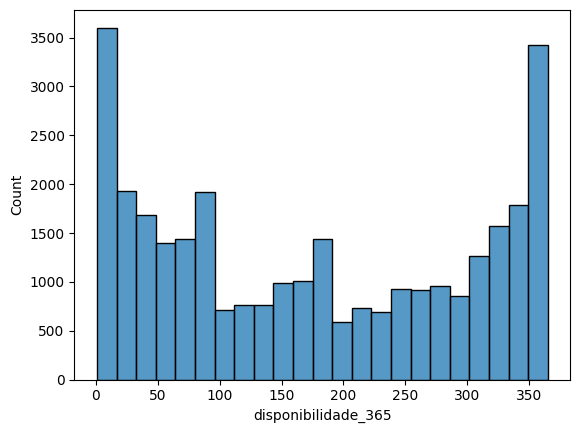

In [231]:
sns.histplot(
    df_disponibilidade,
    x="disponibilidade_365",
    linewidth=1
)

Filtrando os valores zerados, vemos que os dados estão bastante distribuídos entre os grupos.

### **Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

Para responder a essa pergunta, é necessário considerar algumas variáveis, tais como o preço médio por bairro, o número de avaliações recebidos, e a disponibilidade ao longo do ano.

Primeiramente, vamos selecionar os bairros com mais reviews, pois indica que são locais bastante procurados e populares

In [232]:
total_reviews = df_clean.groupby('bairro')['numero_de_reviews'].sum()
df_bairros_por_reviews = total_reviews.sort_values(ascending=False)
lista_bairros_por_reviews = df_bairros_por_reviews.index.tolist()

Listar os bairros pelo preço médio

In [233]:
lista_preco_top_bairros = df_preco_top_bairros['bairro'].tolist()

Selecionar os bairros com menor disponibilidade, pois podem representar uma alta procura na região, especialmente quando se tem muitas avaliações

In [234]:
media_disponibilidade = df_clean.groupby('bairro')['disponibilidade_365'].mean()
df_bairros_por_disponibilidade = media_disponibilidade.sort_values()
lista_bairros_por_disponibilidade = df_bairros_por_reviews.index.tolist()

Por fim, vamos procurar por bairros que tenham muitas avaliações, baixa disponibilidade e preços mais elevados para aluguel

In [235]:
bairro_escolhido = next(bairro for bairro in lista_preco_top_bairros
                         if bairro in lista_bairros_por_reviews
                        and bairro in lista_bairros_por_disponibilidade)

print(bairro_escolhido)

Tribeca


#### O bairro mais indicado para compra, considerando as variáveis escolhidas, é o **Tribeca**!

### **O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

[Text(0.5, 1.0, 'Correlaçao entre variáveis numéricas')]

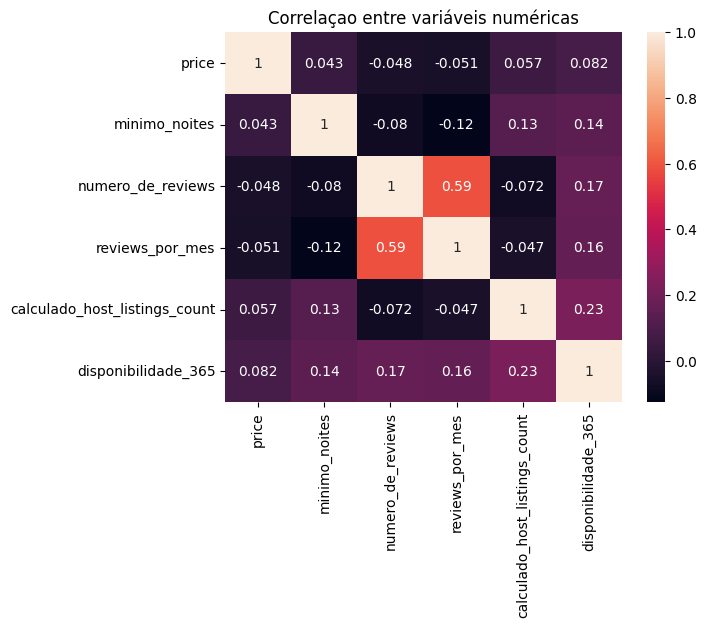

In [236]:
correlacao = df_clean.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True).set(title='Correlaçao entre variáveis numéricas')

Observando o gráfico acima, podemos perceber que não existe uma correlação forte entre essas variáveis e o preço, logo, não é possível concluir que elas inteferem no preço.

Abaixo, vamos investigar um pouco mais afundo essas duas variáveis, através de uma regressão linear para mostrar a relação entre elas e o preço.

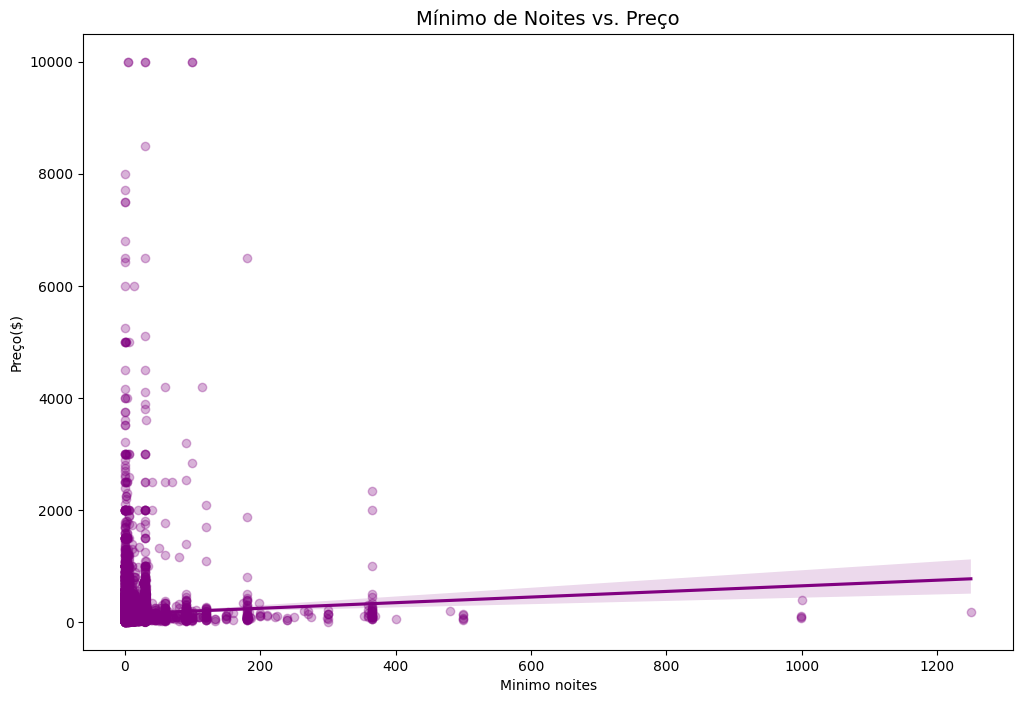

In [237]:
x = [0, 200, 400, 600, 900, 1000, 1200]

plt.figure(figsize=(12, 8))
sns.regplot(y='price', x='minimo_noites', data=df_clean, color='Purple', scatter_kws={'alpha':0.3})
plt.title("Mínimo de Noites vs. Preço", fontsize=14)
plt.ylabel("Preço($)")
plt.xlabel("Minimo noites");

Podemos observar que existe, realmente, uma associação positiva entre o minimo de noites e o preço, mas esta é bastante fraca e os valores não estão distribuídos próximos a reta. Além disso, podemos notar pela sombra em volta da reta, que esta reta apresenta um intervalo de confiança baixo.

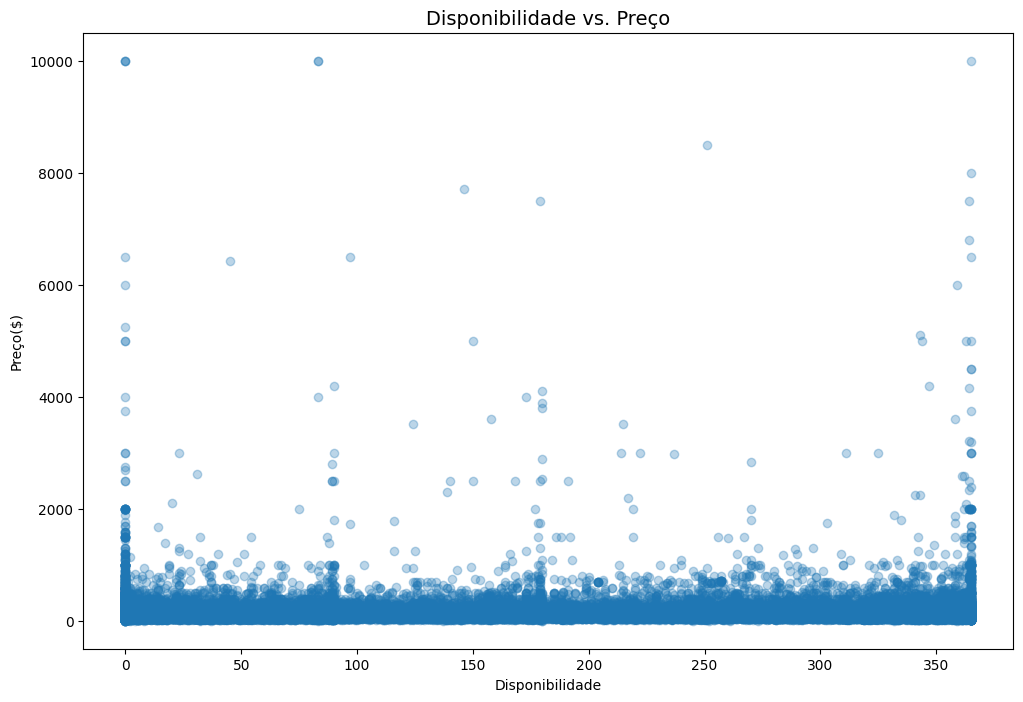

In [238]:
x = [0, 50, 100, 150, 200, 250, 300, 350]

plt.figure(figsize=(12, 8))
sns.regplot(y='price', x='disponibilidade_365', data=df_clean, scatter_kws={'alpha':0.3})
plt.title("Disponibilidade vs. Preço", fontsize=14)
plt.ylabel("Preço($)")
plt.xlabel("Disponibilidade");

Já aqui, podemos observar que não existe uma associação positiva, e os valores estão bastante acumulados.

## **Modelagem**

In [239]:
import pandas as pd

from sklearn import metrics
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import OneHotEncoder

### **Qual tipo de problema estamos resolvendo?**

Estamos resolvendo um problema de regressão, pois queremos prever um valor numérico, no caso o preço.

### **Preparando os dados**

Na preparação dos dados, vamos escolher as variáveis necessárias para construir o modelo e realizar algumas transformações necessárias. 

Como não existem variáveis que apresentam uma correlação forte com o preço, quase todas vão ser utilizadas, com exceção de 'id', 'nome','bairro', 'price', 'ultima_review'. Em relação as transformações, as variáveis categóricas 'room_type' e 'bairro_group' foram transformadas em categorias binárias atráves do método de One-hot-encoding.

In [240]:
data = pd.read_csv("./data/teste_indicium_precificacao_clean.csv")

In [241]:
# Separando features e target
X = data.drop(columns=['id', 'nome','bairro', 'price', 'ultima_review'])
y = data['price']

In [242]:
#Pre-processamento dos dados
room_type_encoder = OneHotEncoder(sparse_output=False)
room_type_encoded = pd.DataFrame(room_type_encoder.fit_transform(X[['room_type']]), columns=room_type_encoder.get_feature_names_out(['room_type']))
bairro_group_encoder = OneHotEncoder(sparse_output=False)
bairro_group_encoded = pd.DataFrame(bairro_group_encoder.fit_transform(X[['bairro_group']]), columns=bairro_group_encoder.get_feature_names_out(['bairro_group']))

X_final = pd.concat([X.drop(columns=['room_type','bairro_group']), room_type_encoded, bairro_encoded], axis=1)

In [243]:
#separando as varáveis entre treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(preprocess_data(X),
                                                                    y,
                                                                    test_size=0.2,
                                                                    random_state=42)

### **Treinando os modelos**

Para encontrar o melhor modelo para prever os dados, vão ser testados os métodos de "Linear Regression" "Ridge", "Lasso", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor" "Support Vector Machines", e compará-los atráves das medidas de avaliação de performance "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error" e "R² Score".

In [244]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Machines": SVR(),
    }

In [245]:
medidas_performance = pd.DataFrame(columns=["modelo", "MAE", "MSE", "RMSE", "R2"])

for i, item in enumerate(models):
    model = models[item]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)

    #MSE
    mse = metrics.mean_squared_error(y_test, y_pred)

    #RMSE
    rmse = metrics.root_mean_squared_error(y_test, y_pred)

    #R²
    r2 = metrics.r2_score(y_test, y_pred)

    modelo_performance = [item,  mae, mse, rmse, r2]

    medidas_performance.loc[i] = modelo_performance

In [246]:
medidas_performance

,modelo,MAE,MSE,RMSE,R2
0,Linear Regression,72.30,52752.17,229.68,0.09
1,Ridge,72.30,52752.15,229.68,0.09
2,Lasso,72.17,52804.35,229.79,0.08
3,Decision Tree Regressor,86.50,84500.78,290.69,-0.47
4,Random Forest Regressor,72.80,59394.88,243.71,-0.03
5,Gradient Boosting Regressor,68.60,52421.59,228.96,0.09
6,Support Vector Machines,79.22,58915.97,242.73,-0.02


Analisando as medidas de performance, vemos que o modelo que melhor aproxima os dados é o **Gradient Boosting Regressor**, embora a taxa de erros se mostre um pouco elevada.

Os pontos positivos desse modelo é que ele possui alta precisão e medidas de erros flexivel; entretanto, ele apresenta um alto risco de overfitting e sua efetividade depende fortemente em encontrar a melhor combinação de hiperparâmetros.


In [247]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [248]:
y_pred = model.predict(X_test)
#MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
#MSE
mse = metrics.mean_squared_error(y_test, y_pred)
#RMSE
rmse = metrics.root_mean_squared_error(y_test, y_pred)
#R²
r2 = metrics.r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 68.600688281912
MSE: 52421.14925403
RMSE: 228.9566536574773
R²: 0.09092066727497561


<Axes: xlabel='price'>

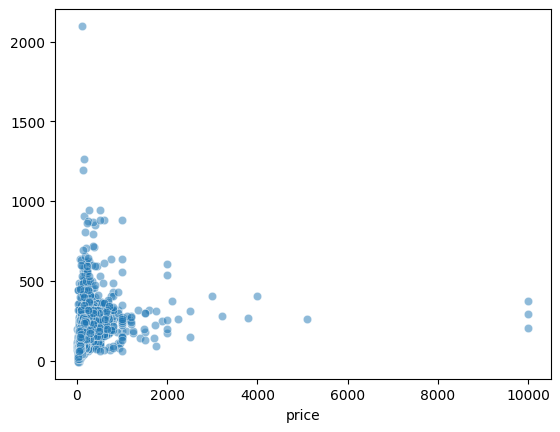

In [249]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [250]:
new_data = pd.DataFrame([{
 'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}]
)

In [251]:
X_data = new_data.drop(columns=['id', 'nome','host_id', 'host_name', 'bairro', 'latitude', 'longitude', 'ultima_review'])

In [252]:
room_type_encoded = pd.DataFrame(room_type_encoder.transform(X_data[['room_type']]), columns=room_type_encoder.get_feature_names_out(['room_type']))
bairro_encoded = pd.DataFrame(bairro_group_encoder.transform(X_data[['bairro_group']]), columns=bairro_group_encoder.get_feature_names_out(['bairro_group']))

X_pred = pd.concat([X_data.drop(columns=['room_type','bairro_group']), room_type_encoded, bairro_encoded], axis=1)
predicted_price = model.predict(X_pred)

In [253]:
print(f'A sugestão de preço para esse apartamento é: {predicted_price[0]:.2f}')

A sugestão de preço para esse apartamento é: 277.96
